去重前数据量: 20358, 去重后数据量: 19779
缺失值处理前:
 actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16988\2703196923.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='viridis')


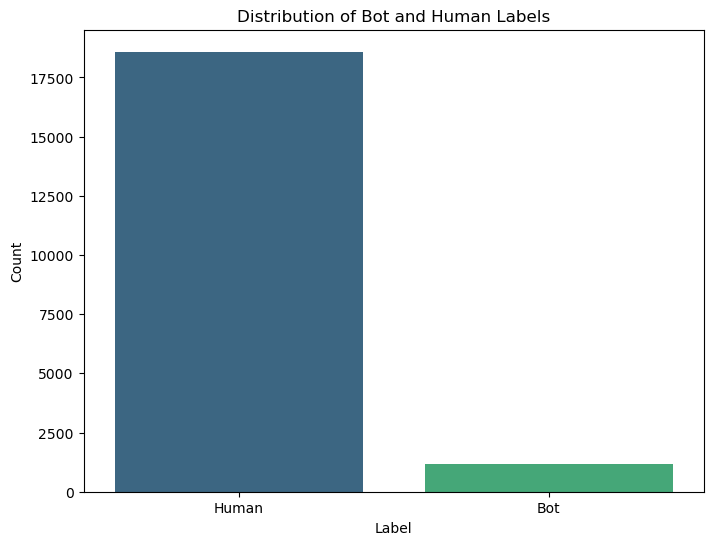

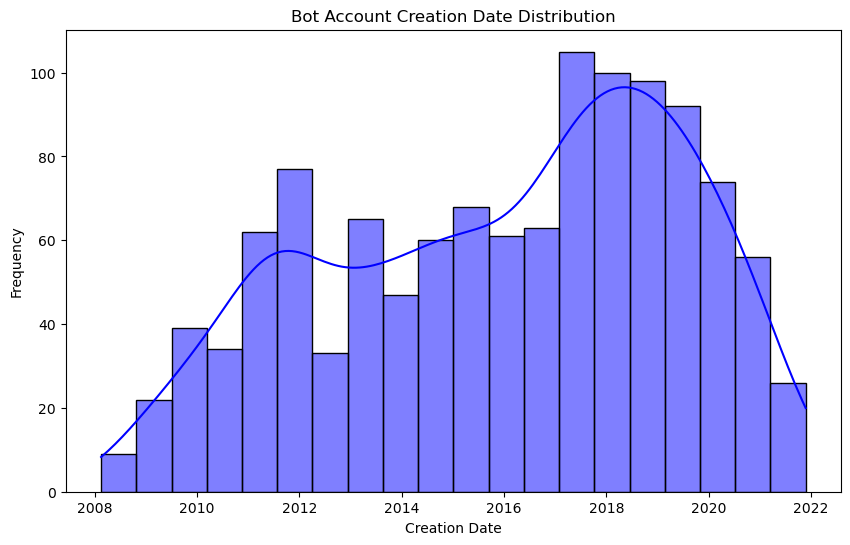

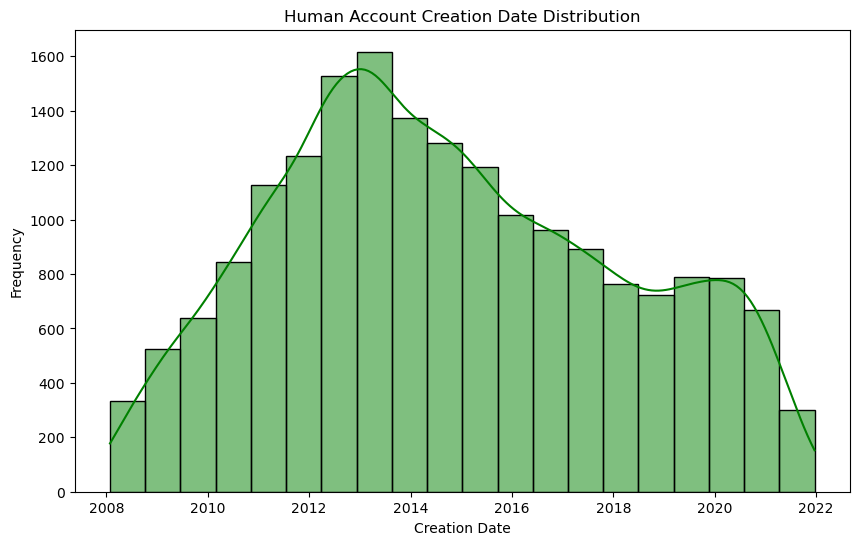

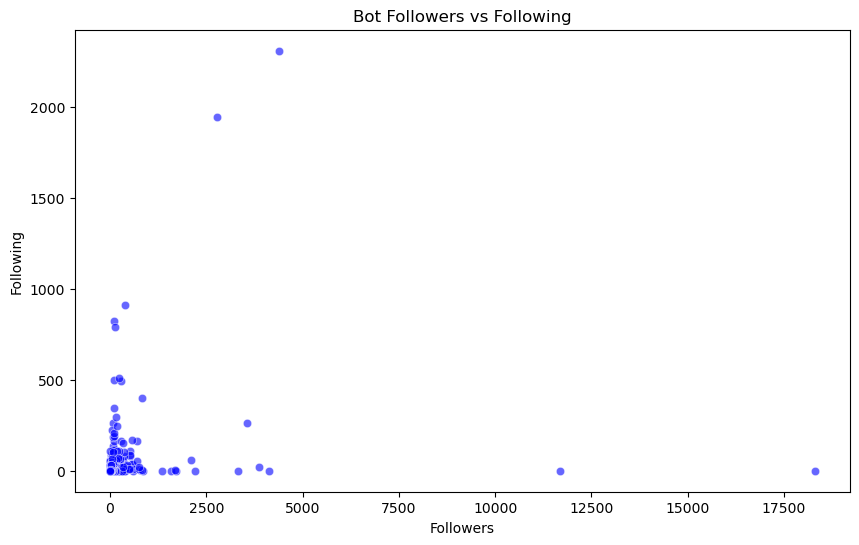

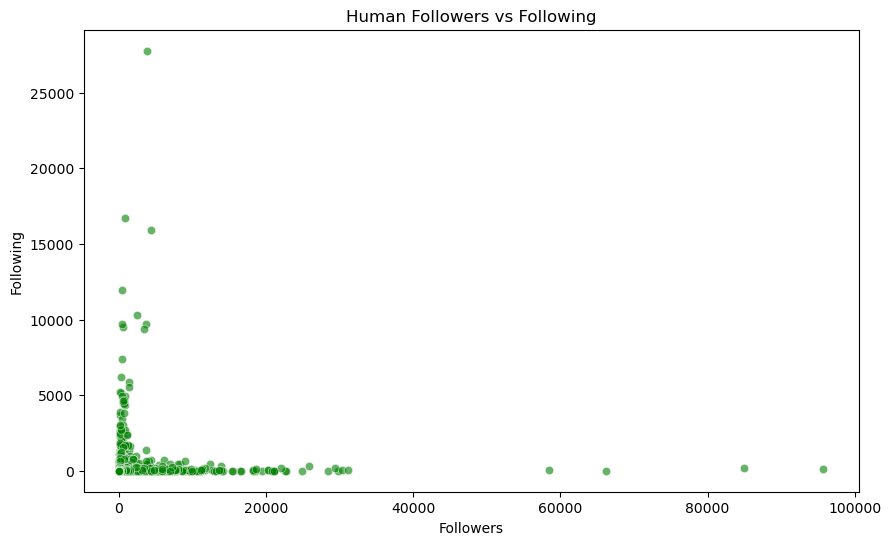

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
raw_data = pd.read_csv('github_bot_raw_data.csv')

# 列字段
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url',
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url',
    'subscriptions_url', 'organizations_url', 'repos_url', 'events_url',
    'received_events_url', 'type', 'site_admin', 'name', 'company', 'blog',
    'location', 'email', 'hireable', 'bio', 'twitter_username', 'public_repos',
    'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]
data = raw_data[columns]

# **1. 删除重复数据，并输出去重前后的数据量**
before_dedup = data.shape[0]
data = data.drop_duplicates()
after_dedup = data.shape[0]
print(f"去重前数据量: {before_dedup}, 去重后数据量: {after_dedup}")

# **2. 缺失值处理**
# 去掉 gravatar_id 列
data = data.drop(columns=['gravatar_id'])

# 查看各列缺失值
missing_values_before = data.isnull().sum()

# 转换为布尔变量的列
bool_columns = ['company', 'blog', 'location', 'email', 'hireable', 'bio', 'twitter_username']
for col in bool_columns:
    data[col] = data[col].notnull()

# 填充文本数据空值为空字符串
text_columns = ['name', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

# 查看缺失值情况
missing_values_after = data.isnull().sum()
print("缺失值处理前:\n", missing_values_before)
print("缺失值处理后:\n", missing_values_after)

# **3. 数据变换：将 created_at 和 updated_at 转为时间戳**
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# **4. 数据可视化**

# **4.1 可视化 bot 和 human 类型的情况**
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label', palette='viridis')
plt.title('Distribution of Bot and Human Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# **4.2 可视化 bot 类型账号的 created_at 分布**
bot_data = data[data['label'] == 'Bot']
plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], bins=20, kde=True, color='blue')
plt.title('Bot Account Creation Date Distribution')
plt.xlabel('Creation Date')
plt.ylabel('Frequency')
plt.show()

# **4.3 可视化 human 类型账号的 created_at 分布**
human_data = data[data['label'] == 'Human']
plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], bins=20, kde=True, color='green')
plt.title('Human Account Creation Date Distribution')
plt.xlabel('Creation Date')
plt.ylabel('Frequency')
plt.show()

# **4.4 可视化 bot 类型账号的 followers 和 following 情况**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bot_data, x='followers', y='following', color='blue', alpha=0.6)
plt.title('Bot Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

# **4.5 可视化 human 类型账号的 followers 和 following 情况**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_data, x='followers', y='following', color='green', alpha=0.6)
plt.title('Human Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()
